In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import imutils
import cv2


**Đọc vào file mnist.csv được biến dataframe df. Hiển thị df.**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Hoc Sau/mnist.csv')
df.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**  Từ dataframe df, chọn dataframe giá trị nhãn y là cột đầu tiên của df, dataframe X là tất cả các cột còn lại của df. Hiển thị X,y.**

In [ ]:
df.info()
y=df['5']
X = df.drop('5', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, 5 to 0.617
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
print(y)

0        0
1        4
2        1
3        9
4        2
        ..
59994    8
59995    3
59996    5
59997    6
59998    8
Name: 5, Length: 59999, dtype: int64


In [ ]:
print(X)

       0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.608  0.609  \
0      0    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      0    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      0    0    0    0    0    0    0    0    0    0  ...      0      0   
...   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59994  0    0    0    0    0    0    0    0    0    0  ...      0      0   
59995  0    0    0    0    0    0    0    0    0    0  ...      0      0   
59996  0    0    0    0    0    0    0    0    0    0  ...      0      0   
59997  0    0    0    0    0    0    0    0    0    0  ...      0      0   
59998  0    0    0    0    0    0    0    0    0    0  ...      0      0   

       0.610  0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0          0      0    

**Chia ngẫu nhiên X,y thành X_train,y_train và X_test,y_test theo tỉ lệ 70:30. Hiển thị X_test,y_test.**


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size= 0.3 ,stratify=y,random_state= 1)

In [ ]:
print("X-Test")
print(X_test)

X-Test
       0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.608  0.609  \
37075  0    0    0    0    0    0    0    0    0    0  ...      0      0   
47825  0    0    0    0    0    0    0    0    0    0  ...      0      0   
18573  0    0    0    0    0    0    0    0    0    0  ...      0      0   
58024  0    0    0    0    0    0    0    0    0    0  ...      0      0   
51960  0    0    0    0    0    0    0    0    0    0  ...      0      0   
...   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
44281  0    0    0    0    0    0    0    0    0    0  ...      0      0   
21084  0    0    0    0    0    0    0    0    0    0  ...      0      0   
31902  0    0    0    0    0    0    0    0    0    0  ...      0      0   
22910  0    0    0    0    0    0    0    0    0    0  ...      0      0   
38828  0    0    0    0    0    0    0    0    0    0  ...      0      0   

       0.610  0.611  0.612  0.613  0.614  0.615  0.616  0.617  
37075      0    

In [ ]:
print("Y-Test")
print(Y_test)

Y-Test
37075    4
47825    4
18573    8
58024    5
51960    2
        ..
44281    3
21084    8
31902    6
22910    7
38828    9
Name: 5, Length: 18000, dtype: int64


In [ ]:
kVals = range(1, 100, 2)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 100, 2):
	# train the k-Nearest Neighbor classifier with the current value of `k`
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(X_train, Y_train)

	# evaluate the model and update the accuracies list
	score = model.score(X_test, Y_test)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	accuracies.append(score)

# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies[i] * 100))

k=1, accuracy=97.06%
k=3, accuracy=97.25%
k=5, accuracy=96.99%
k=7, accuracy=96.81%
k=9, accuracy=96.76%
k=11, accuracy=96.63%
k=13, accuracy=96.43%
k=15, accuracy=96.31%
k=17, accuracy=96.20%
k=19, accuracy=96.07%
k=21, accuracy=95.96%
k=23, accuracy=95.88%
k=25, accuracy=95.74%
k=27, accuracy=95.68%
k=29, accuracy=95.59%
k=31, accuracy=95.45%
k=33, accuracy=95.39%
k=35, accuracy=95.33%
k=37, accuracy=95.22%
k=39, accuracy=95.17%
k=41, accuracy=95.07%
k=43, accuracy=95.03%
k=45, accuracy=94.94%
k=47, accuracy=94.86%
k=49, accuracy=94.82%
k=51, accuracy=94.77%
k=53, accuracy=94.69%
k=55, accuracy=94.61%
k=57, accuracy=94.56%
k=59, accuracy=94.46%
k=61, accuracy=94.43%
k=63, accuracy=94.33%
k=65, accuracy=94.28%
k=67, accuracy=94.23%
k=69, accuracy=94.15%
k=71, accuracy=94.09%
k=73, accuracy=94.03%
k=75, accuracy=93.96%
k=77, accuracy=93.93%
k=79, accuracy=93.86%
k=81, accuracy=93.83%
k=83, accuracy=93.80%
k=85, accuracy=93.77%
k=87, accuracy=93.72%
k=89, accuracy=93.69%
k=91, accuracy=

**. Dự báo kết quả và đánh giá độ chính xác dự báo trên tập X_test,y_test.**

In [ ]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(Y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1777
           1       0.85      1.00      0.92      2023
           2       0.98      0.88      0.93      1787
           3       0.93      0.93      0.93      1839
           4       0.97      0.91      0.94      1753
           5       0.94      0.92      0.93      1626
           6       0.96      0.98      0.97      1775
           7       0.93      0.94      0.94      1880
           8       0.98      0.86      0.91      1755
           9       0.88      0.93      0.91      1785

    accuracy                           0.93     18000
   macro avg       0.94      0.93      0.94     18000
weighted avg       0.94      0.93      0.93     18000



**Nhận dạng chữ với ảnh bằng Opencv2**

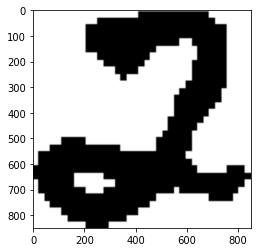

In [ ]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-0.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

resized image shape: (28, 28, 4)
Grayscale image shape: (28, 28)


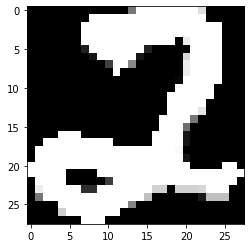

In [ ]:
import cv2
array_img = np.asarray(img)
resized_img = cv2.resize(array_img, (28, 28))
print("resized image shape:", resized_img.shape)
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
print("Grayscale image shape:", gray_img.shape)
image = cv2.bitwise_not(gray_img)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [ ]:
image = image/255
print(image)
image = image.reshape(1,-1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.4627451  1.         1.         1.         1.
  1.         1.         1.         1.         0.87058824 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         1.         1.         1.         1.
  1.       

In [ ]:
prediction = np.argmax(model.predict(image))
print("predicted digit:", str(prediction))

predicted digit: 0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import imutils
import numpy as np
from imutils.contours import sort_contours

image = cv2.imread("/content/drive/MyDrive/Hoc Sau/vd.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
# initialize the list of contour bounding boxes and associated
# characters that we'll be OCR'ing
chars = []

Do model Hình em Train dự đoán ko được chính xác lắm nên đưa ra dự đoán sai .

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
[1]
[INFO] 0 - 100.00%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


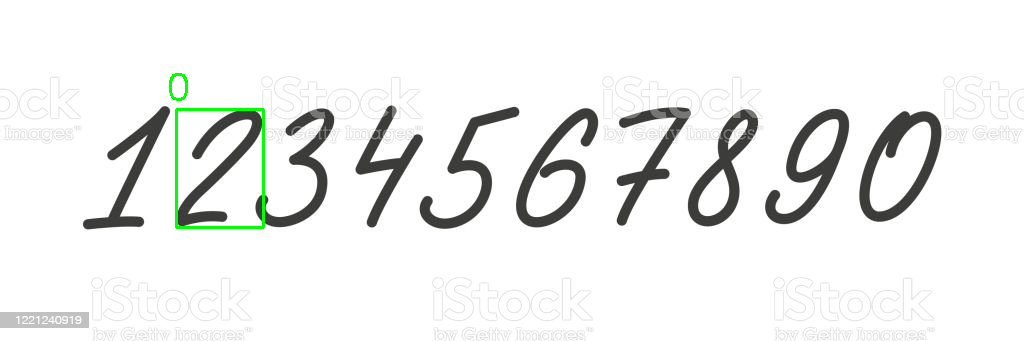

IndexError: ignored

In [ ]:
from google.colab.patches import cv2_imshow
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
    if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,
                               cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        (tH, tW) = thresh.shape
        # if the width is greater than the height, resize along the
        # width dimension
        if tW > tH:
            thresh = imutils.resize(thresh, width=28)
        # otherwise, resize along the height
        else:
            thresh = imutils.resize(thresh, height=28)
            (tH, tW) = thresh.shape
            dX = int(max(0, 28 - tW) / 2.0)
            dY = int(max(0, 28 - tH) / 2.0)
            # pad the image and force 28x28 dimensions
            padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
                                        left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
                                        value=(0, 0, 0))
            padded = cv2.resize(padded, (28, 28))
            print(padded.shape)
            # prepare the padded image for classification via our
            # handwriting OCR model
            padded = padded.astype("float32") / 255.0
            padded = np.expand_dims(padded, axis=-1)
            # update our list of characters that will be OCR'd
            chars.append((padded, (x, y, w, h)))
# extract the bounding box locations and padded characters
boxes = [b[1] for b in chars]

chars = np.array([c[0] for c in chars], dtype="float32")

for i in range(1,len(chars)):
  chars=chars[i].reshape(1,-1)
  
  # OCR the characters using our handwriting recognition model
  preds = model.predict(chars)
  print(preds)
  # define the list of label names
  labelNames = "0123456789"
  labelNames = [l for l in labelNames]
  for (pred, (x, y, w, h)) in zip(preds, boxes):
      # find the index of the label with the largest corresponding
      # probability, then extract the probability and label
      i = np.argmax(pred)
      prob = pred
      label = labelNames[i]
      # draw the prediction on the image
      print("[INFO] {} - {:.2f}%".format(label, prob* 100))
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
      cv2.putText(image, label, (x - 10, y - 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)
      # show the image
      cv2_imshow(image)




**CNN**

In [ ]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential()
model.add(Dense(32,input_dim=784,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=128,validation_data=(X_test, y_test),epochs=20 ,verbose=1)

Epoch 1/20
329/329 [==============================] - 3s 7ms/step - loss: 0.0000e+00 - accuracy: 0.1120 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 2/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1119 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 3/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1119 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 4/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1119 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 5/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1119 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 6/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1119 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 7/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.0
accuracy= 0.11238888651132584


**Sử dụng autoencoder 2D để giảm chiều dữ liệu của X_train và X_test**

In [ ]:

X_train = X_train/255
X_test = X_test/255

In [ ]:

encoding_dim = 32
from keras.models import Model
from keras.layers import Input, Dense
input_img = Input(shape=(784,))
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
encoded = Dense(encoding_dim, activation='relu') (input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(X_train,X_train, epochs=5, batch_size=128, shuffle=True,
                validation_data= (X_test,X_test))

Epoch 1/5
329/329 [==============================] - 6s 16ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 2/5
329/329 [==============================] - 4s 11ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 3/5
329/329 [==============================] - 4s 11ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 4/5
329/329 [==============================] - 6s 17ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 5/5
329/329 [==============================] - 5s 16ms/step - loss: 0.6922 - val_loss: 0.6921


** Sử dụng PCA để giảm chiều dữ liệu của X_train và X_test**

In [ ]:
from sklearn.decomposition import PCA
рса = PCA(32) 
рса.fit(X_train)
TRAIN= рса.transform(X_train)
TEST = рса.transform(X_test)
approximation=рса.inverse_transform(TEST) 
print(TRAIN)
print(type(TRAIN))
print(TRAIN.shape)

[[-0.8354301  -3.2766185  -1.9230684  ...  0.52768975 -0.31704292
   1.3887513 ]
 [ 4.437015    1.3619323   1.9478533  ... -0.65517306  0.07294416
  -0.8501115 ]
 [ 5.5029902   0.6387526   1.2199163  ... -0.16157845  0.2778429
  -0.620139  ]
 ...
 [ 0.31979546  2.1360347   0.89348006 ...  0.06790257 -1.2584934
   0.55836606]
 [ 0.3905471   0.18130736  2.934424   ... -0.07849997 -0.2597994
   0.3698339 ]
 [-3.5295143   2.0206964  -0.02405521 ... -0.17556122  0.18340665
   1.110446  ]]
<class 'numpy.ndarray'>
(41999, 32)


In [ ]:
input_img = Input(shape=(32,))
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
encoded = Dense(10, activation='relu') (input_img)
decoded = Dense(32, activation='sigmoid')(encoded)
pca = Model(input_img, decoded)

In [ ]:
pca.compile(optimizer='adadelta', loss='binary_crossentropy')
pca.fit(TRAIN,TRAIN, epochs=5, batch_size=128, shuffle=True,
                validation_data= (TEST,TEST))

Epoch 1/5
329/329 [==============================] - 3s 5ms/step - loss: 0.7638 - val_loss: 0.7610
Epoch 2/5
329/329 [==============================] - 1s 3ms/step - loss: 0.7612 - val_loss: 0.7583
Epoch 3/5
329/329 [==============================] - 1s 3ms/step - loss: 0.7583 - val_loss: 0.7554
Epoch 4/5
329/329 [==============================] - 1s 3ms/step - loss: 0.7552 - val_loss: 0.7522
Epoch 5/5
329/329 [==============================] - 1s 3ms/step - loss: 0.7520 - val_loss: 0.7490
